# Engineering Quantum Physics - Final Project
NCKUES N96131281

## Import

In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi
import math
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_experiments.library import StateTomography
from qiskit.quantum_info import DensityMatrix, partial_trace,state_fidelity,Pauli,SparsePauliOp,negativity,concurrence
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np


## Set up oracle

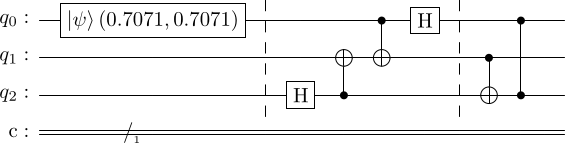

In [5]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

# circuit.x(qreg_q[0])
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],0)
# qc.initialize(1,0,0)
qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
qc.h(qreg_q[2])
qc.cx(qreg_q[2], qreg_q[1])
qc.cx(qreg_q[0], qreg_q[1])
qc.h(qreg_q[0])
qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
qc.cx(qreg_q[1], qreg_q[2])
qc.cz(qreg_q[0], qreg_q[2])
# qc.measure(qreg_q[2],creg_c)

qc.draw('latex',filename='circuit.pdf')

In [3]:

# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(channel="ibm_quantum", # ibm_cloud 
#                                token = '3cf0fe1ffee5e23249070e9f0dff02f52702e0a20d143908e40bda826e93de2e1066929c5a2ee2b3c1427616b534d26f67daa67b508098fd253793783e702132')


In [4]:
# backend = service.backend(name = "ibm_brisbane")
# backend.num_qubits

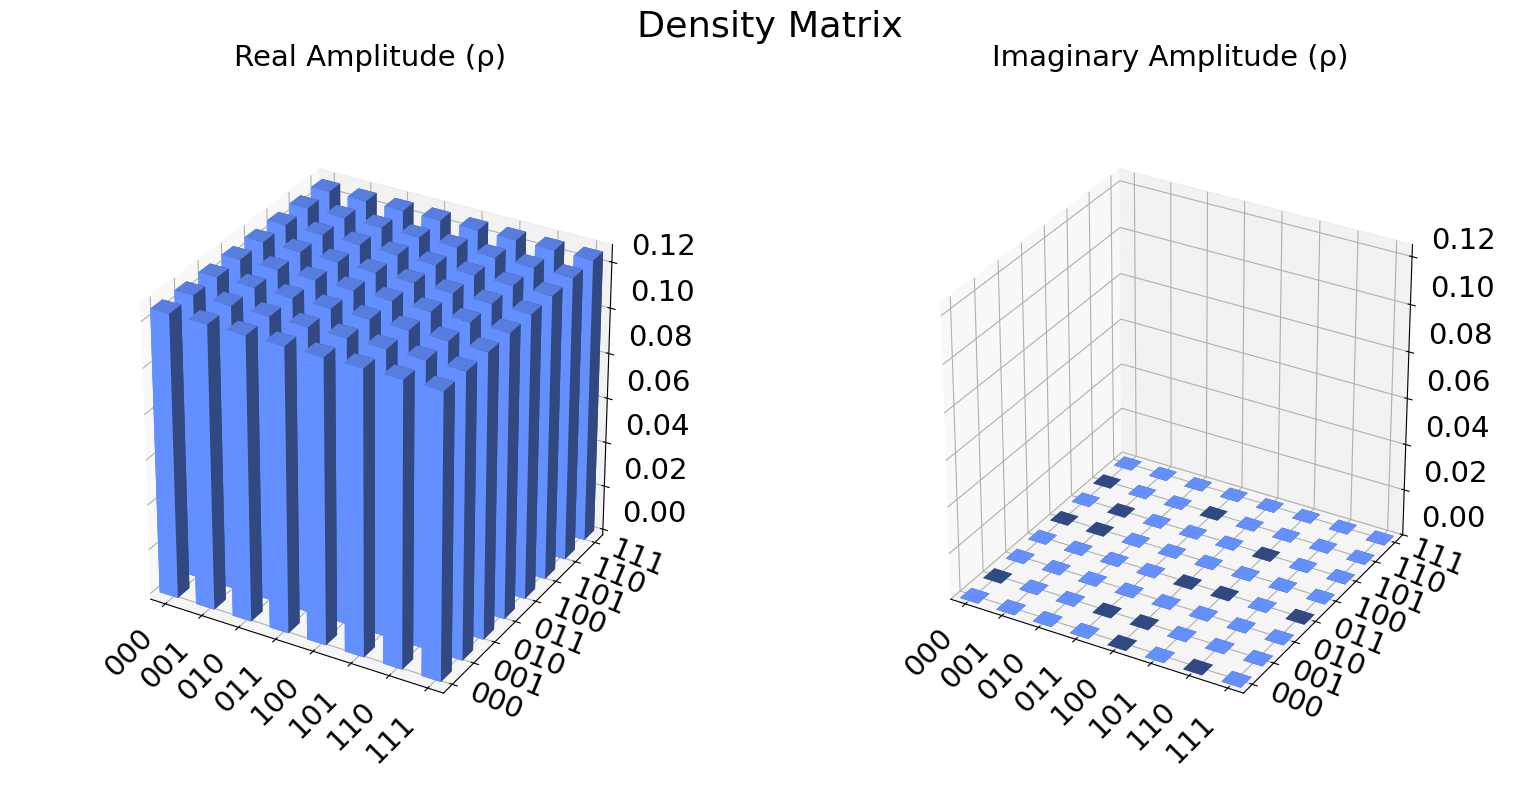

In [24]:
state=DensityMatrix(qc)
plot_state_city(state, title='Density Matrix')

In [6]:
simulator = AerSimulator()

## 1. Quantum State Tomography

In [7]:
qstexp1 = StateTomography(qc)
# qstdata1 = qstexp1.run(backend=backend).block_for_results()
qstdata1 = qstexp1.run(backend=simulator).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[0.12725822+0.00000000e+00j, 0.12309009+2.78368673e-03j,
                0.12309893+3.61817842e-03j, 0.12099295+9.56474663e-03j,
                0.12852445+2.36175898e-03j, 0.12613178+1.02181933e-02j,
                0.12013115+1.23966749e-05j, 0.11477074+4.31078426e-03j],
               [0.12309009-2.78368673e-03j, 0.1242656 +0.00000000e+00j,
                0.12229493+6.63266439e-04j, 0.11943973+2.61550858e-03j,
                0.12921542-1.23053744e-04j, 0.12843822+6.78463265e-03j,
                0.12078311-6.81963905e-04j, 0.1203944 +6.23319477e-04j],
               [0.12309893-3.61817842e-03j, 0.12229493-6.63266439e-04j,
                0.12114589+4.33680869e-19j, 0.11885976+3.38736697e-03j,
                0.12737527-1.04562102e-03j, 0.12605956+6.28475688e-03j,
                0.11897117-2.03668263e-03j, 0.11677968+6.09781394e-04j],
               [0.12099295-9.56474663e-03j, 0.11943973-2.61550858e-03j,
                0.11885

In [8]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance='ibm-q/open/main',
#     token='3cf0fe1ffee5e23249070e9f0dff02f52702e0a20d143908e40bda826e93de2e1066929c5a2ee2b3c1427616b534d26f67daa67b508098fd253793783e702132'
# )
# job = service.job('cxpm00gy1ae0008mxfdg')
# job_result = job.result()

In [9]:
state_result = qstdata1.analysis_results("state")

## Negativity

In [10]:
neg = negativity(state_result.value, qargs=[2])

print(f"Negativity of qubit q2: {neg}")

Negativity of qubit q2: 0.019520752071117475


Partial trace on q0 & q1

<class 'qiskit.quantum_info.states.densitymatrix.DensityMatrix'>
Density matrix rho after teleportation:


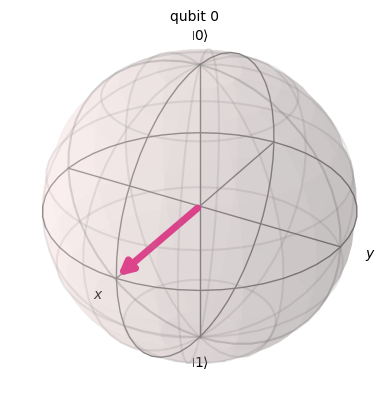

<IPython.core.display.Latex object>

In [11]:

rho_reduce = partial_trace(state_result.value, qargs=[0,1])
print(type(rho_reduce))
print("Density matrix rho after teleportation:")
display(rho_reduce.draw("bloch"))
display(array_to_latex(rho_reduce))

<class 'qiskit.quantum_info.states.densitymatrix.DensityMatrix'>


<IPython.core.display.Latex object>

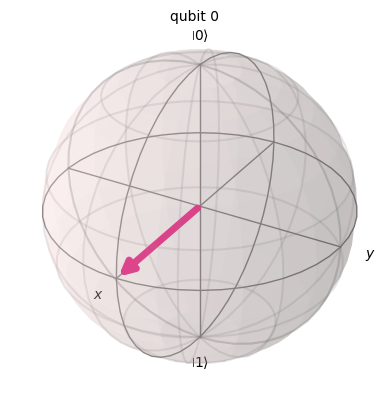

In [12]:
rho_plus = DensityMatrix.from_label('+')
print(type(rho_plus))
display(rho_plus.draw('latex'))
display(rho_plus.draw('bloch'))

## 2. Fidelity

https://docs.quantum.ibm.com/api/qiskit/quantum_info#qiskit.quantum_info.state_fidelity

In [13]:
Fidility=state_fidelity(rho_plus,rho_reduce)
print(f"Fidility between the ideal 𝜌 and the transported 𝜌′is {Fidility}")

Fidility between the ideal 𝜌 and the transported 𝜌′is 0.9898720291199634


In [14]:
# rho = DensityMatrix(qc)
# rho_a = partial_trace(state=rho, qargs=[1,2])
# print(rho_a)
# # 選擇部分跡的 qubits： 在 partial_trace 中，必須準確指定需要消除的 qubits（例如 [0, 2]）。

In [15]:
# qc.measure(2,0)

# # Transpile for simulator
# simulator = AerSimulator()
# circ = transpile(qc, simulator)

# # Run and get counts
# result = simulator.run(circ,shots=2048).result()
# counts = result.get_counts(circ)
# plot_histogram(counts, title='quantum teleportation of Bob',color='gray')

## 3. CHSH Inequality
https://learning.quantum.ibm.com/tutorial/chsh-inequality

$|\psi\rangle =\frac{|00\rangle + |11\rangle}{\sqrt{2}}$

In [12]:
# psi = Statevector([1/np.sqrt(2),0,0,-1/np.sqrt(2)])
psi = 0.5*Statevector([1,1j,-1j,1j])

In [13]:
des=0.5*(DensityMatrix.from_label('00')+DensityMatrix.from_label('11'))
des.draw("latex")

<IPython.core.display.Latex object>

In [14]:
psi.draw("latex")

<IPython.core.display.Latex object>

In [16]:
print(concurrence(des))
print(negativity(des,qargs=[0]))

0.0
0.0


In [44]:
Q = SparsePauliOp(["Z"])
R = SparsePauliOp(["X"])

S = SparsePauliOp(["Z", "X"], coeffs=[-1/np.sqrt(2), -1/np.sqrt(2)])
T = SparsePauliOp(["Z", "X"], coeffs=[1/np.sqrt(2), -1/np.sqrt(2)])

$\langle \hat{Q}\hat{S} \rangle = \langle \psi | (\hat{Q} \otimes \hat{S}) | \psi \rangle$

In [45]:
QS = Q.tensor(S)  # Q ⊗ S
RS = R.tensor(S)  # R ⊗ S
RT = R.tensor(T)  # R ⊗ T
QT = Q.tensor(T)  # Q ⊗ T

In [46]:
QS.to_matrix().shape

(4, 4)

Check if experiment on IBMQ violates: 

$| \langle QS \rangle + \langle RS \rangle + \langle RT \rangle - \langle QT \rangle | \leq 2$

In [47]:
qs_expectation = psi.expectation_value(QS)
rs_expectation = psi.expectation_value(RS)
rt_expectation = psi.expectation_value(RT)
qt_expectation = psi.expectation_value(QT)

CHSH_value = qs_expectation + rs_expectation + rt_expectation - qt_expectation

print("⟨QS⟩ =", qs_expectation)
print("⟨RS⟩ =", rs_expectation)
print("⟨RT⟩ =", rt_expectation)
print("⟨QT⟩ =", qt_expectation)
print("CHSH value =", CHSH_value)

⟨QS⟩ = (-0.35355339059327373+0j)
⟨RS⟩ = (0.7071067811865475+0j)
⟨RT⟩ = 0j
⟨QT⟩ = (-0.35355339059327373+0j)
CHSH value = (0.7071067811865475+0j)


In [55]:
qs_expectation = des.expectation_value(QS)
rs_expectation = des.expectation_value(RS)
rt_expectation = des.expectation_value(RT)
qt_expectation = des.expectation_value(QT)

CHSH_value = qs_expectation + rs_expectation + rt_expectation - qt_expectation

print("⟨QS⟩ =", qs_expectation)
print("⟨RS⟩ =", rs_expectation)
print("⟨RT⟩ =", rt_expectation)
print("⟨QT⟩ =", qt_expectation)
print("CHSH value =", CHSH_value)

⟨QS⟩ = (-0.7071067811865475+0j)
⟨RS⟩ = 0j
⟨RT⟩ = 0j
⟨QT⟩ = (0.7071067811865475+0j)
CHSH value = (-1.414213562373095+0j)
